# 取得股價資訊

In [2]:
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

from scipy.optimize import minimize

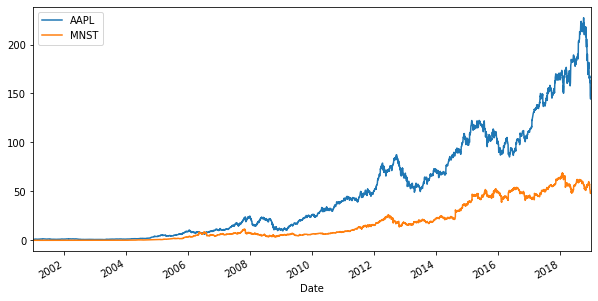

In [4]:
stocks=['AAPL','MNST']
start_date='01/01/2001'
end_date='01/01/2019'

#用DataReader爬取股價資訊。
data=web.DataReader(stocks,data_source='yahoo',start=start_date,end=end_date)['Adj Close']
data.columns=stocks

data.plot(figsize=(10,5))
plt.show()

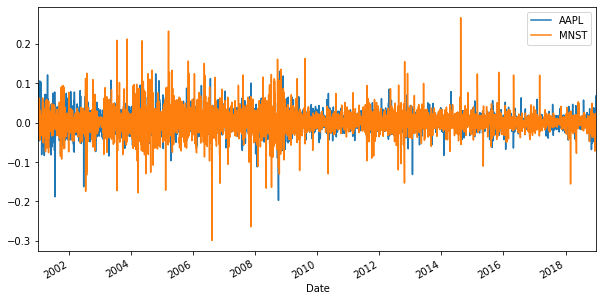

In [5]:
#算出Returns
returns=np.log(data/data.shift(1))

returns.plot(figsize=(10,5))
plt.show()

In [9]:
#由上圖可看出MNST報酬波動較大

print(returns.mean()*252)
print(returns.cov()*252)   #一年之中交易日通常有252天

AAPL    0.285327
MNST    0.357968
dtype: float64
          AAPL      MNST
AAPL  0.134261  0.035043
MNST  0.035043  0.226871


In [10]:
#計算權重

weights=np.random.random(len(stocks))
weights/=np.sum(weights)

# 計算Portfolio Returns & Variances

In [14]:
preturns=[]
pvariances=[]

for i in range(100000):
    weights=np.random.random(len(stocks))
    weights/=np.sum(weights)
    preturns.append(np.sum(returns.mean()*weights)*252)
    pvariances.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights))))

preturns=np.array(preturns)
pvariances=np.array(pvariances)  #轉換成array

# 繪製效率前緣

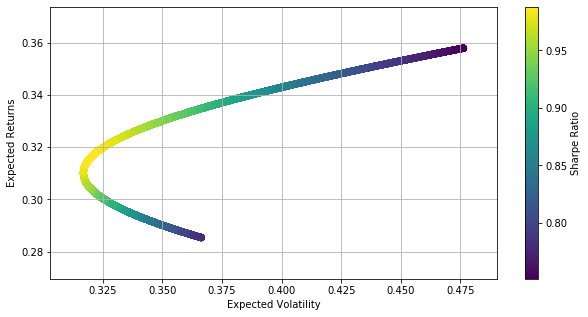

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(pvariances,preturns,c=preturns/pvariances,marker='o') #c=returns/variances
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharpe Ratio')
plt.show()